In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
x = pd.get_dummies(df.drop(["id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1))
y = df["trip_duration"]

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

# Decision Tree model

In [5]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [6]:
from math import sqrt
train_predict = regressor.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  5.141649463598704


In [7]:
from math import sqrt
test_predict = regressor.predict(test_x)
k1 = sqrt(mse(test_predict,test_y))
print("testing rmse ",k1)

testing rmse  5.831656072482232


# To interpret the variable importance.

In [8]:
x.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y'],
      dtype='object')

In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


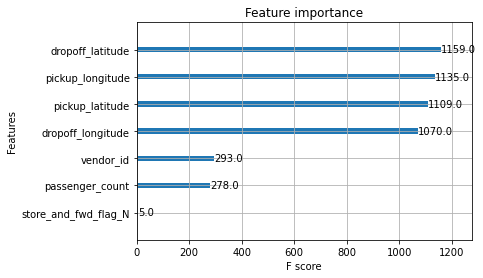

In [10]:
#Using XGBoost in order to interpret the variable importance
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
model = XGBRegressor()
model.fit(x,y)
plot_importance(model)
plt.show()

From the above graph we can draw an insight that the varaible "dropoff_latitude" has more impact on the trip duration variable followed by "pickup_longitude" then "pickup_latitude"

In [11]:
#calculating the train score of decision tree model
decision_train_score = regressor.score(train_x,train_y)
decision_train_score*100

99.99984196840444

In [12]:
#calculating the test score of decision tree model
decision_test_score = regressor.score(test_x,test_y)
decision_test_score*100

99.99964408872123

In [13]:
#storing the test score to use it in other file
%store decision_test_score

Stored 'decision_test_score' (float64)


In [14]:
#storing the train score to use it in other file
%store decision_train_score

Stored 'decision_train_score' (float64)


# Conclusions

1.The training RMSE of decision model is 5.141. Where as the testing RMSE is 5.831. They are almost equal so its the best fit

2.When the feature importance was being interpreted ,we drew an insight that the varaible "dropoff_latitude" has more impact on the trip duration variable followed by "pickup_longitude" then "pickup_latitude"

3.The train score and test score is 99.99 so we can consider that decision tree is the best model for predicting the trip duration variable.
